In [47]:
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../../RKLM_Python/')
# Path to output files
sys.path.append('../')

import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal
import pickle

# For which test case do we plot?
`swe` is the shallow water vortex, `euler` the Euler vortex and `rb` the rising bubble.

In [48]:
swe = False
euler = False
rb = True

# Plot format for MWR or arXiv?
MWR = True
arXiv = False

## For given test case, load the relevant parameters

In [49]:
def load(base_fn,Nx,Ny,et,Nz=None):
    pydir = '../../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    return tc, tags

if swe:
    base_fn = 'output_swe_vortex'
    Nx, Ny, Nz = 64, 1, 64
    et = 3.0
    tc, tags = load(base_fn,Nx,Ny,et,Nz)
    
    attr_labels = pt.swe_labels()
    attributes = ['rho','p2_nodes','rhou','rhow']
    obs_attrs = 'rhou_rhow'
    aux = 'wda'
    aux_ref = ''
    lbl = 'swe'
    times = np.arange(0.0,3.01,0.01)[1:]
    
    x_axs = [-0.5,0.0,0.5]
    y_axs = [-0.5,0.0,0.5]
    axs0, axs1 = Nx, Nz

elif euler:
    base_fn = "output_travelling_vortex"
    Nx, Ny = 64, 64
    et = 3.0
    tc, tags = load(base_fn,Nx,Ny,et)
    
    attr_labels = pt.labels()
    attributes = ['rho','rhoY','rhou','rhov']
    obs_attrs = 'rhou_rhov'
    aux = 'wda'
    aux_ref = ''
    lbl = 'euler'
    times = np.arange(0.0,3.01,0.01)[1:]
#     times = np.arange(0.0,3.01,0.01)[1:10]
    
    x_axs = [-0.5,0.0,0.5]
    y_axs = [-0.5,0.0,0.5]
    axs0, axs1 = Nx, Ny
    
elif rb:
    base_fn = "output_rising_bubble"
    Nx, Ny = 160,80
    et = 1.0
    tc, tags = load(base_fn,Nx,Ny,et)
    
    attr_labels = pt.labels()
    attributes = ['rho','rhoY','rhou','rhov']
    obs_attrs = 'rhou_rhov'
    aux = 'wda_CFLfixed'
    aux_ref = '_CFLfixed'
    lbl = 'rb'
    times = np.arange(1.0,10.1,0.1) / 10.0
    
    x_axs = [-10,-5,0.0,5,10]
    y_axs = [0.0,5.0,10.0]
    axs0, axs1 = Nx, Ny
    
ens_noda_suffix = 'noda%s_ib-0' %aux_ref
ens_noda_label = 'EnNoDA'

ens_1_suffix = 'wdawloc_%s_%s_ib-0' %(obs_attrs,aux)
ens_1_label = r'EnDA'
#     ens_1_label = r'Ens. w/ DA'

ens_2_suffix = tc.cb_suffix(1,0, '%s' %(ens_1_suffix))
ens_2_label = r'EnDAB'
#     ens_2_label = r'Ens. w/ DA+Blending'

if euler:
    ens_1_label += r', $\{ \rho u, \rho v \}$'
    ens_2_label += r', $\{ \rho u, \rho v \}$'

    obs_attrs_34 = 'all'
    ens_3_suffix = 'wdawloc_%s_%s_ib-0' %(obs_attrs_34,aux)
    ens_3_label = r'EnDA, $\{ \rho, \rho u, \rho v, \rho \Theta, \pi \}$'
    ens_4_suffix = tc.cb_suffix(1,0, '%s' %(ens_3_suffix))
    ens_4_label = r'EnDAB, $\{ \rho, \rho u, \rho v, \rho \Theta, \pi \}$'

# Ensemble size is the same across all test cases
N = 10

## Plot the RMSEs

(91, 10, 160, 80) (91, 10, 160, 80)
(91, 10, 160, 80) (91, 10, 160, 80)
(91, 10, 160, 80) (91, 10, 160, 80)
(91, 10, 160, 80) (91, 10, 160, 80)
(91, 10, 160, 80) (91, 10, 160, 80)
(91, 10, 160, 80) (91, 10, 160, 80)
(91, 10, 160, 80) (91, 10, 160, 80)
(91, 10, 160, 80) (91, 10, 160, 80)
(91, 10, 160, 80) (91, 10, 160, 80)
(91, 10, 160, 80) (91, 10, 160, 80)
(91, 10, 160, 80) (91, 10, 160, 80)
(91, 10, 160, 80) (91, 10, 160, 80)


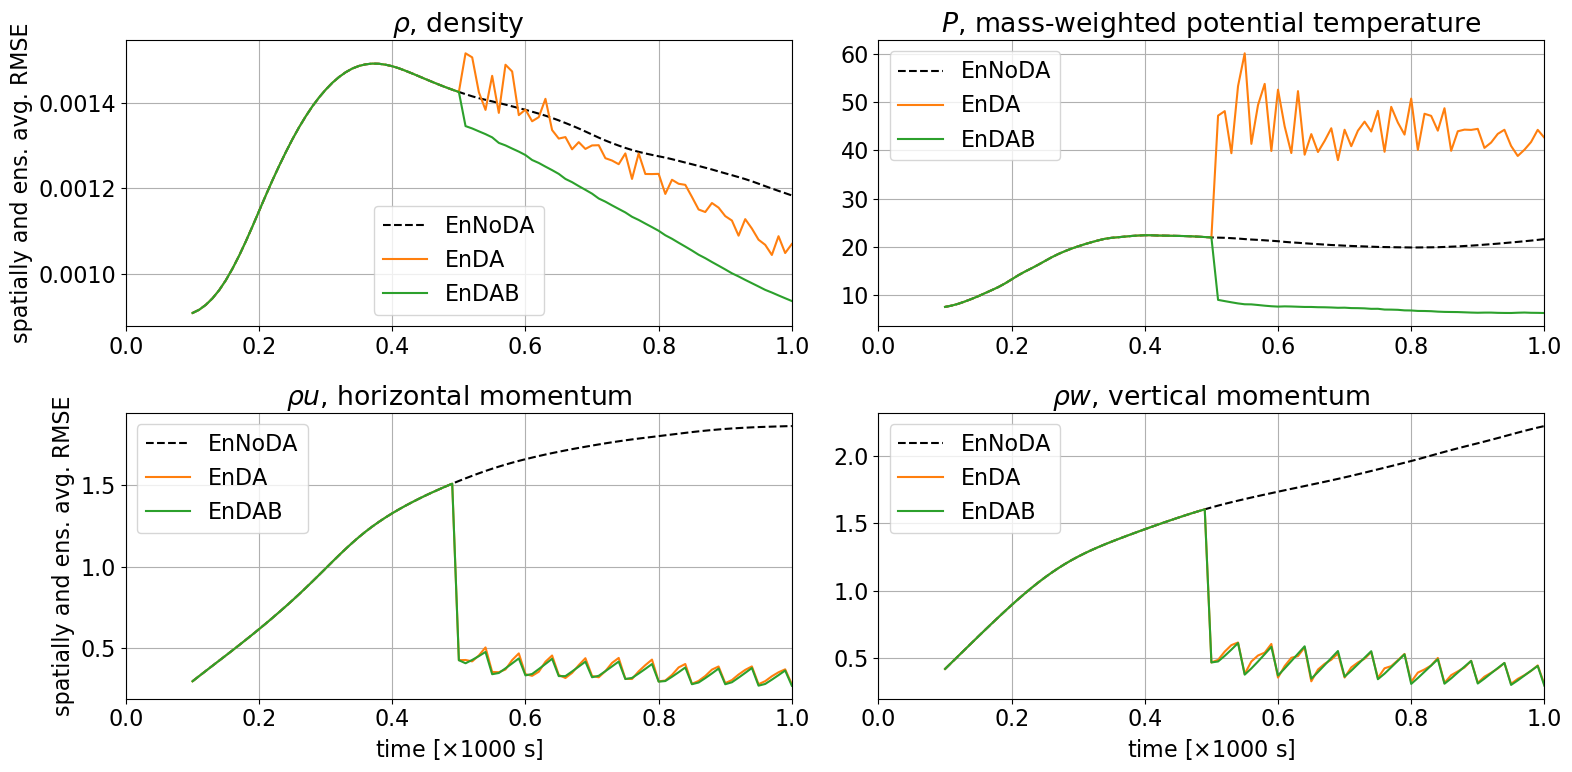

In [50]:
import matplotlib.pyplot as plt

plt.style.use('default')

fs = (16,8) # MWR and arXiv
nrows = 2
if MWR:
    pl = pt.plotter_1d(figsize=fs,fontsize=16,ncols=2,nrows=nrows)
elif arXiv:
    pl = pt.plotter_1d(figsize=fs,fontsize=16,ncols=2,nrows=nrows)

def ic_loader(tc, N, sfx, lbl):
    # load pickled instances of data used in simulation
    fn_pickle = tc.get_filename(N,sfx,format='dat')
    path_pickle = tc.get_path(fn_pickle)

    file = open(path_pickle,'rb')
    ud = pickle.load(file)
    file.close()

    return ud

def unitify(arr,attribute,tc,N,sfx,lbl):
    ud = ic_loader(tc,N,sfx,lbl)
    if swe:
        if attribute == 'rho' or attribute == 'p2_nodes':
            arr *= ud.h_ref
        if attribute == 'rhou' or attribute == 'rhow':
            arr *= ud.h_ref * ud.u_ref
    else:
        if attribute == 'rho':
            arr *= ud.rho_ref
        if attribute == 'rhou' or attribute == 'rhov':
            arr *= ud.rho_ref * ud.u_ref
        if attribute == 'rhoY' or attribute == 'p2_nodes':
            arr *= ud.p_ref
            if lbl == 'euler':
                arr /= 1000.0 # units in kPa for the Euler RMSEs in rhoY and p2_nodes
        
    if attribute == 'p2_nodes':
        arr *= ud.Msq
    return arr
    

def get_ens(sfx,attribute,lbl,diff=False):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type='TIME', avg=False, diff=diff)[1:]
    if swe:
        ens = ens[:,:,0,:]
        
    ens = unitify(ens, attribute, tc, N, sfx, lbl)
        
    return ens

for i,attribute in enumerate(attributes):
    gt = 'n' if attribute == 'p2_nodes' else 'c'
    
    ens_noda = get_ens(ens_noda_suffix,attribute,lbl)
    ens_1 = get_ens(ens_1_suffix,attribute,lbl)
    ens_2 = get_ens(ens_2_suffix,attribute,lbl)

    if euler:
        ens_3 = get_ens(ens_3_suffix,attribute,lbl)
        ens_4 = get_ens(ens_4_suffix,attribute,lbl)

    truth = tc.get_ensemble(times, 1, attribute, 'truth%s_ib-0' %aux_ref, label_type='TIME',avg=True)[1:]
    if swe: truth = truth[:,:,0,:]
    truth = unitify(truth, attribute, tc, 1, 'truth%s_ib-0' %aux_ref,lbl)

    ax = pl.get_ax(i)
    avg = False

    diff_noda = tc.spatially_averaged_rmse(ens_noda,truth,avg=avg,grid_type=gt)
    diff_ens_1 = tc.spatially_averaged_rmse(ens_1,truth,avg=avg,grid_type=gt)
    diff_ens_2 = tc.spatially_averaged_rmse(ens_2,truth,avg=avg,grid_type=gt)
    if euler:
        diff_ens_3 = tc.spatially_averaged_rmse(ens_3,truth,avg=avg,grid_type=gt)
        diff_ens_4 = tc.spatially_averaged_rmse(ens_4,truth,avg=avg,grid_type=gt)
#     ax.set_ylabel('spatial and ens. averaged RMSE')
#     if swe:
#         ax.set_xlabel(r'time [$\times 100$ s]', ha='center', va='center', labelpad=5)
#     else:
#         ax.set_xlabel(r'time [$\times 100$ s]', ha='center', va='center')
    
    l1 = ax.plot(times,diff_noda, 'k--', label=ens_noda_label)
    l2 = ax.plot(times,diff_ens_1, 'C1', label=ens_1_label)
    l3 = ax.plot(times,diff_ens_2, 'C2', label=ens_2_label)
    if euler:
        l4 = ax.plot(times,diff_ens_3, 'C1--', label=ens_3_label)
        l5 = ax.plot(times,diff_ens_4, 'C2--', label=ens_4_label)

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([0.0,times[-1]])
    ax.grid()
    if not euler:
        ax.legend()
    
    plt.tight_layout(rect=[-0.0, -0.0, 1.0, 1.0])
    
    if MWR:
        if attribute == 'rho':
            ax.set_ylabel("spatially and ens. avg. RMSE")
        elif attribute == 'rhou':
            ax.set_ylabel("spatially and ens. avg. RMSE")
    elif arXiv:
        if attribute == 'rho':
            ax.set_ylabel("RMSE")
        elif attribute == 'rhou':
            ax.set_ylabel("RMSE")
    if euler:
        if attribute == 'rhou':
            ax.set_xlabel(r'time [$\times 100$ s]')
        elif attribute == 'rhov':
            ax.set_xlabel(r'time [$\times 100$ s]')
    elif rb:
        if attribute == 'rhou':
            ax.set_xlabel(r'time [$\times 1000$ s]')
        elif attribute == 'rhov':
            ax.set_xlabel(r'time [$\times 1000$ s]')
    
if euler:
    pl.fig.tight_layout()
    if MWR:
        pl.fig.subplots_adjust(bottom=0.22)
    elif arXiv:
        pl.fig.subplots_adjust(bottom=0.22)
    pl.fig.legend((l1, l2, l3, l4, l5), 
                  labels=('EnNoDA', r'EnDA $\{ \rho u, \rho w \}$', r'EnDAB $\{ \rho u, \rho w \}$', 
                          r'EnDA $\{ \rho, \rho u, \rho w, P, \pi \}$', r'EnDAB $\{ \rho, \rho u, \rho w, P, \pi \}$'),
#                   ncol=5,
                  ncol=3,
                  loc='lower center',
                  bbox_to_anchor=(0.5, -0.01, 0.0, 0.0),
                  fontsize='large'
                 )
    
# plt.tight_layout()
plt.savefig('./output/%sRmse.pdf' %(lbl), bbox_inches="tight")
plt.show()

## Plot the ensemble members

12
0 -213.80724277627604 28.646039800250822
1 -213.8703443172685 28.662693828196417
2 -213.8336238340921 28.639518454254276
3 -204.7498755828614 27.72740502050119
4 -1967.7034851539377 1770.100460753743
5 -1963.636480137909 1791.9620308418648
6 -1971.9054313892093 1791.86349592797
7 -1966.182967495733 1786.0307316129274
8 -247.12019323763766 51.56796265876062
9 -251.18289813446103 51.59873152480454
10 -247.28342607832633 50.12072844606807
11 -245.4502030042871 50.49997118067195


/home/ray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:207: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
../plotting_tools.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.arr_lst = np.array(arr_lst)


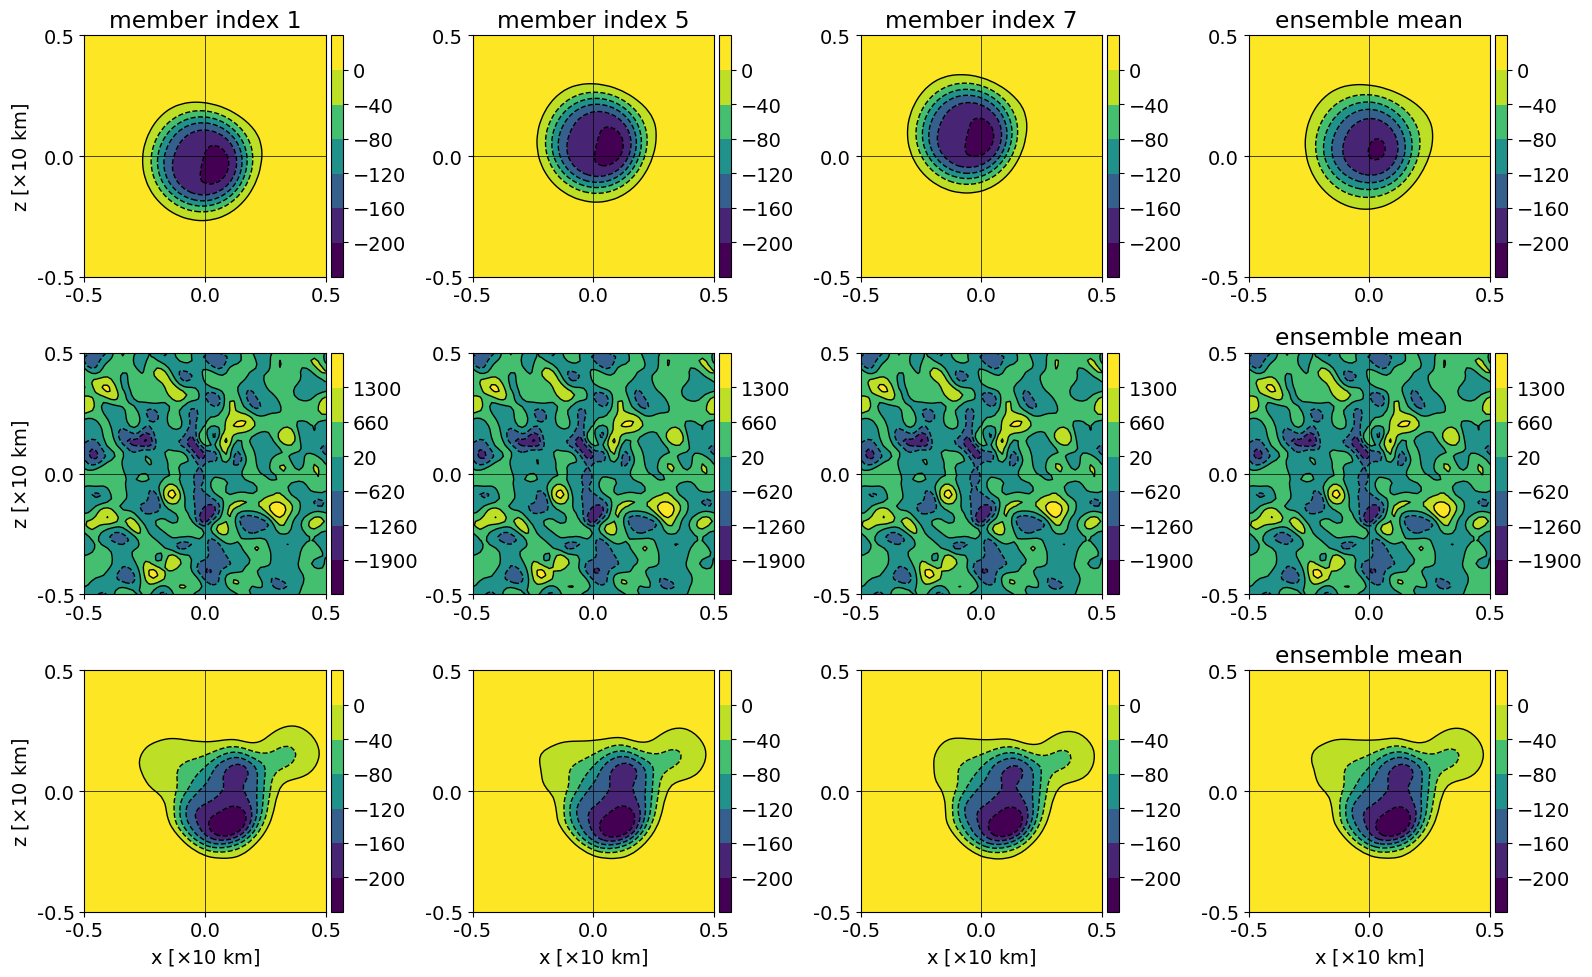

In [46]:
# plot pressure / water depth perturbation
attributes = ['p2_nodes']
# attributes = ['rho']

# plot the very last output
ens_time = [times[-1]] 
tag = tags[9]

class oo(object): pass
ens0_oo = oo()
ens1_oo = oo()
ens_ref_oo = oo()

if euler:
    ens_1_suffix = ens_3_suffix
    ens_2_suffix = ens_4_suffix

if len(attributes) > 1:
    # for plotting of derived quantities, e.g. u,v,w, and Theta.
    for attribute in attributes:
        ens0 = tc.get_ensemble(times, N, attribute, ens_1_suffix, tag=tag, inner=True)[-1]
        ens1 = tc.get_ensemble(times, N, attribute, ens_2_suffix, tag=tag, inner=True)[-1]
        ens_ref = tc.get_ensemble(times, N, attribute, ens_noda_suffix, tag=tag, inner=True)[-1]
        setattr(ens0_oo,attribute,ens0)
        setattr(ens1_oo,attribute,ens1)
        setattr(ens_ref_oo,attribute,ens_ref)

    ens0 = getattr(ens0_oo,attributes[1]) / getattr(ens0_oo,attributes[0])
    ens1 = getattr(ens1_oo,attributes[1]) / getattr(ens1_oo,attributes[0])
    ens_ref = getattr(ens_ref_oo,attributes[1]) / getattr(ens_ref_oo,attributes[0])
else:
    ens0 = tc.get_ensemble(times, N, attributes[0], ens_1_suffix, tag=tag, inner=True)[-1]
    ens1 = tc.get_ensemble(times, N, attributes[0], ens_2_suffix, tag=tag, inner=True)[-1]
    ens_ref = tc.get_ensemble(times, N, attributes[0], ens_noda_suffix, tag=tag, inner=True)[-1]
    
    ens0_rhoY = tc.get_ensemble(times, N, 'rhoY', ens_1_suffix, tag=tag, inner=True)[-1]
    ens1_rhoY = tc.get_ensemble(times, N, 'rhoY', ens_2_suffix, tag=tag, inner=True)[-1]
    ens_ref_rhoY = tc.get_ensemble(times, N, 'rhoY', ens_noda_suffix, tag=tag, inner=True)[-1]
    
def p_converter(ens,rhoY,ud):
    dp2n = np.array([ (mem - mem.mean()) * ud.Msq for mem in ens ])
    kernel = np.ones((2,2))
    dp2c = np.array([signal.fftconvolve(mem, kernel, mode='valid') / kernel.sum() for mem in dp2n])

    P0 = (rhoY**(ud.gamm-1.0) - dp2c)**(1.0/(ud.gamm-1.0))
    p = rhoY**(ud.gamm) - P0**(ud.gamm)
    p *= ud.p_ref
    return p


def ic_loader(tc, sfx, lbl):
    # load pickled instances of data used in simulation
    fn_pickle = tc.get_filename(N,sfx,format='dat')
    path_pickle = tc.get_path(fn_pickle)

    file = open(path_pickle,'rb')
    ud = pickle.load(file)
    file.close()
    
#     if lbl == 'swe':
#         p_ref = ud.h_ref * ud.Msq
#     elif lbl == 'euler':
#         p_ref = ud.p_ref * ud.Msq
#     elif lbl =='rb':
#         p_ref = ud.p_ref * ud.Msq

#     return p_ref
    return ud

ud = ic_loader(tc,ens_1_suffix,lbl)

ens_ref = p_converter(ens_ref, ens_ref_rhoY, ud)
ens0 = p_converter(ens0, ens0_rhoY, ud)
ens1 = p_converter(ens1, ens1_rhoY, ud)

enses = [ens_ref, ens0, ens1]
sfxes = [ens_noda_suffix, ens_1_suffix, ens_2_suffix]

if swe:
    mean0 = np.mean(ens0,axis=0)[:,0,:] 
    mean1 = np.mean(ens1,axis=0)[:,0,:]
    mean_ref = np.mean(ens_ref,axis=0)[:,0,:]
else:
    mean0 = np.mean(ens0,axis=0)
    mean1 = np.mean(ens1,axis=0)
    mean_ref = np.mean(ens_ref,axis=0)

diff = False
if diff == True:
    mean0 -= mean_ref
    mean1 -= mean_ref

if MWR:
    mean0 = [mean0.T,'ensemble mean']
    mean1 = [mean1.T,'ensemble mean']
    mean_ref = [mean_ref.T,'ensemble mean']
elif arXiv:
    mean0 = [mean0.T,'']
    mean1 = [mean1.T,'']
    mean_ref = [mean_ref.T,'ensemble mean']
means = [mean_ref, mean0, mean1]

arr_lst = []
lvls = []
ens_store, ens_diff = [], []
for bb,ens in enumerate(enses):
    sfx = sfxes[bb]
    fs = (14,8)
        
    ens_arr = []
    for n,arr in enumerate(ens):
        arr_ref = ens_ref[n]
        if swe:
            arr_ref = arr_ref[:,0,:].T
            arr = arr[:,0,:].T
        else:
            arr_ref = arr_ref.T
            arr = arr.T

        if diff == True:
            arr -= arr_ref
            
        if rb:
            if bb == 1:
                ens_store.append(arr)
            if bb == 2:
                if MWR:
                    ens_diff.append([ens_store[n] - (arr), 'member index %i' %n])
                elif arXiv:
                    ens_diff.append([ens_store[n] - (arr), ''])
        
        if bb == 0:
            if MWR:
                ens_arr.append([arr, 'member index %i' %n])
            elif arXiv:
                ens_arr.append([arr, 'member index %i' %n])
        else:
            ens_arr.append([arr, ''])
            

    # which members to plot?
    arr_lst += [ens_arr[1],ens_arr[5],ens_arr[7]]
#     arr_lst += [ens_arr[0],ens_arr[1],ens_arr[2],ens_arr[3],ens_arr[4],ens_arr[5],ens_arr[6],ens_arr[7],ens_arr[8],ens_arr[9]]
    # append mean to plot
    arr_lst.append(means[bb])

    if rb:
        # exner levels
#         if bb == 0:
#             lvls += [np.arange(-50,40,10)]*4
#         elif bb == 1:
#             lvls += [np.arange(-70,60,20)]*4
#         elif bb == 2:
#             lvls += [np.arange(-50,40,10)]*4
        # pressure levels
        if bb == 0:
            lvls += [np.arange(-100,60,20)]*4
        elif bb == 1:
#             lvls += [np.arange(-70,60,20)]*4
            lvls += [np.arange(-160,120,40)]*4
        elif bb == 2:
#             lvls += [np.arange(-50,40,10)]*4
            lvls += [np.arange(-100,60,20)]*4
            
        
    if euler:
#         # exner levels
#         if bb == 0:
#             lvls += [np.arange(-55,15,10)]*4
#         elif bb == 1:
#             lvls += [np.arange(-550.0,650.0,150.0)]*4
#         elif bb == 2:
#             lvls += [np.arange(-70,10,10)]*4
        # pressure levels
        if bb == 0:
            lvls += [np.arange(-200,40,40)]*4
        elif bb == 1:
#             lvls += [np.arange(-550.0,650.0,150.0)]*4
            lvls += [np.arange(-1900,1300+640,640)]*4
        elif bb == 2:
            lvls += [np.arange(-200,40,40)]*4
    
if rb:
    # which member-diffs to plot?
    arr_lst += [ens_diff[1],ens_diff[5],ens_diff[7]]
    # append mean to plot
    if MWR:
        mean_diff = [means[1][0] - means[2][0], 'ensemble mean']
    elif arXiv:
        mean_diff = [means[1][0] - means[2][0], '']
    arr_lst.append(mean_diff)
#     lvls += [np.arange(-30,50,10)]*4 # exner levels
    lvls += [np.arange(-80,130,30)]*4 # pressure levels
print(len(lvls))

for idx, arr in enumerate(arr_lst):
    if idx % 4 == 0:
        print("===========")
    print(idx, arr[0].min(),arr[0].max())

# if attributes[0] == 'p2_nodes':
#     nnx, nnz = axs0, axs1
#     axh, axv = 32, 32
# else:
nnx, nnz = axs0-1,axs1-1
    
narr_lst = np.array(arr_lst)
ncolslen = 4
if MWR:
    fs = (20,10) if rb else (16,10)
elif arXiv:
    fs = (18,9) if rb else (13,7)
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharexlabel=True,shareylabel=True)

x_label = r'x [$\times 10$ km]'
y_label = r'z [$\times 10$ km]'

if rb:
    x_loc = np.linspace(0,nnx,5)
    y_loc = np.linspace(0,nnz,3)
    axh, axv = 39.5, 79.5
    pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
#     pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, axhline = axh, axvline = axv, x_label=x_label, y_label=y_label)
else:
    x_loc = np.linspace(0,nnx,3)
    y_loc = np.linspace(0,nnz,3)
    axh, axv = 31.5, 31.5
    pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, axhline = axh, axvline = axv, x_label=x_label, y_label=y_label)

# mthd = 'imshow' if rb else 'contour'
mthd = 'contour'
_ = pl.plot(aspect='equal',method=mthd, lvls=lvls)

pl.save_fig('./output/%s_enses' %lbl)